# Introduction

According to the CNN article, more than 72000 overdose deaths in the US in 2017. Over 130 opioid-related drug overdose deaths happened every day in 2016 and 2017. Some crime incidents are also caused by people who misuse drugs. It is important for us to prevent these life tragedies from happening again and again. We should take more preventive actions. One preventive action is to identify the active drug users and give them extra supports. 

Nicotine is one of the drugs that cause serious problems both on human bodies and our environment. American Cancer Society (2018) mention that 1 out of 5 deaths in the US is because of smoking. Smoking cigaretts kills more people than alcohol, illegal drugs, car accidents, gun violence combined. Cigarettes are also likely to cause fire problems. In this paper, I will focus on drug nicotine, the main ingredient of tobacco products. I try to identify active nicotine users so that we could give them extra helps and lower their life risks.

Drug consumption data set from UCI Machine Learning Repository provides us the consumption data of 19 drugs such as alcohol, heroin, cocaine, nicotine, etc. The data set also includes demographics information and personality traits of each individual. I try to use demographics and personality traits to predict whether an individual is an active nicotine user, that is, consumed nicotine in the last year.

References:

Fehrman, E., Muhammad, A. K., Mirkes, E. M., Egan, V., & Gorban, A. N. (2017). The Five Factor Model of personality and evaluation of drug consumption risk. In Data Science (pp. 231-242). Springer, Cham.

CNN Library. Opioid Crisis Fast Facts. Retrieved from: https://www.cnn.com/2017/09/18/health/opioid-crisis-fast-facts/index.html

American Cancer Society (2018). Health Risks of Smoking Tobacco. Retrieved from: https://www.cancer.org/cancer/cancer-causes/tobacco-and-cancer/health-risks-of-smoking-tobacco.html

# Dataset

The data that is used in this project originally comes from the UCI machine learning repository: https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29.

The dataset was collected over 12-month online survey provided by SurveyGizmo from March 2011 to March 2012. Their primarily targeted participants are people from English-speaking countries. The targeted participants need to be at least 18 years old.

The dataset includes 1885 individuals, and 32 features. The 32 features includes id, 5 demographic features, 7 personality traits, and 19 different drug consumptions. The demographic features include age, gender, education, country, ethnicity. The personality trait features include neuroticism (Nscore), extraversion (Escore), openness to experience (Oscore), agreeableness (Ascore), conscientiousness (Cscore), impulsiveness, and sensation seeking(SS). Drug Nicotine is the focus in this paper.

# Project Definition

Predict if a person is an active nicotine user.

If a person use Nicotine in the last year, then he/she is active Nicotine user. If a person use Nicotine in the last decade, over a decade ago, or never use, then he/she is non-active Nicotine user.

# Data Exploration

In this section, first load the dataset into a dataframe (df), define the OUTPUT_LABEL, calculate the prevalence of the positive class, briefly explore the columns and the unique value of each valuable.

In [1]:
import pandas as pd

In [2]:
# load txt into dataframe df, seperate by , no header in the original download txt file
df = pd.read_csv('drug_consumption.data.txt',sep=',',header=None)

In [3]:
# see the original dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
# add headers to each column
df.columns = ["ID","Age","Gender","Education","Country","Race",
              "Nscore","Escore","Oscore","Ascore","Cscore","Impulsive","SS",
              "Alcohol","Amphet","Amyl","Benzos","Caff","Cannabis","Choc","Coke","Crack","Ecstasy",
              "Heroin","Ketamine","Legalh","LSD","Meth","Mushrooms","Nicotine","Semer","VSA"]

In [5]:
# To show all the columns, show the first 14 columns here
df[list(df.columns)[:14]].head()

,ID,Age,Gender,Education,Country,Race,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4


In [6]:
# These columns represent 18 different drugs
df[list(df.columns)[14:32]].head()

,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [7]:
print('Number of samples:',len(df))

Number of samples: 1885


In [8]:
print('Number of columns:',len(df.columns))

Number of columns: 32


In [9]:
# The original data set use different number for different categories
# for example, gender column, 0.48246 = Female, -0.48246= Male 
df.describe()

,ID,Age,Gender,Education,Country,Race,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [10]:
# CL0 means never used. 
# CL1 means used over a Decade ago. 
# CL2 means used in Last Decade. 
# CL3 means used in last year. 
# CL4 means Used in last month. 
# CL5 used in last week. 
# CL6 used in last day.
df.groupby('Nicotine').size()

Nicotine
CL0    428
CL1    193
CL2    204
CL3    185
CL4    108
CL5    157
CL6    610
dtype: int64

Create a column called OUTPUT_LABEL based on your data that is 0 for your negative class and 1 for your positive class

In [11]:
# Positive class = Active User = classes CL3-CL6
# Negative class = "Non-active user" = CL0-CL2
df['OUTPUT_LABEL'] = ((df.Nicotine == 'CL3')|(df.Nicotine == 'CL4')|
                      (df.Nicotine == 'CL5')|(df.Nicotine == 'CL6')).astype('int')

In [12]:
df[['OUTPUT_LABEL']].head()

,OUTPUT_LABEL
0,0
1,1
2,0
3,0
4,0


In [13]:
df.head()

,ID,Age,Gender,Education,Country,Race,Nscore,Escore,Oscore,Ascore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,OUTPUT_LABEL
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,1
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,0


Calculate the prevalence of the positive class

In [14]:
def calc_prevalence(y_actual):
    # this function calculates the prevalence of the positive class (label = 1)
    return (sum(y_actual)/len(y_actual))

In [15]:
print('prevalence of the positive class: %.3f'%calc_prevalence(df['OUTPUT_LABEL'].values))

prevalence of the positive class: 0.562


The prevelance in this project means 56.2% of the observations are active users of Nicotine. Active users means they consume Nicotine in the last year, last month, last week, or last day. Non-active users means they only consume Nicotine in the last decade, or never consume.

In [16]:
df.dtypes

ID                int64
Age             float64
Gender          float64
Education       float64
Country         float64
Race            float64
Nscore          float64
Escore          float64
Oscore          float64
Ascore          float64
Cscore          float64
Impulsive       float64
SS              float64
Alcohol          object
Amphet           object
Amyl             object
Benzos           object
Caff             object
Cannabis         object
Choc             object
Coke             object
Crack            object
Ecstasy          object
Heroin           object
Ketamine         object
Legalh           object
LSD              object
Meth             object
Mushrooms        object
Nicotine         object
Semer            object
VSA              object
OUTPUT_LABEL      int64
dtype: object

In the original dataset, ID is integer, demographics and personalities columns are floating-point numbers which means they are numerical numbers with decimal point, achohol and 18 drugs are categorical features, output_label is binary either 0 or 1.

In this datasest, demographics are numberical features, which is not right. Age and education should be ordinal features. Gender, country, and race are categorical features.

In [17]:
# to see the unique value for each columns 
# for each column in my column names:
for c in list(df.columns):
    
    # get a list of unique values
    n = df[c].unique()
    
    # if number of unique values is less than 30, print the values. Otherwise print the number of unique values
    if len(n)<30:
        print(c)
        print(n)
    else:
        print(c + ': ' +str(len(n)) + ' unique values')

ID: 1885 unique values
Age
[ 0.49788 -0.07854 -0.95197  2.59171  1.09449  1.82213]
Gender
[ 0.48246 -0.48246]
Education
[-0.05921  1.98437  1.16365 -1.22751 -1.7379   0.45468 -0.61113 -2.43591
 -1.43719]
Country
[ 0.96082  0.24923 -0.57009 -0.28519 -0.09765  0.21128 -0.46841]
Race
[ 0.126   -0.31685  0.1144  -0.22166 -0.50212 -1.10702  1.90725]
Nscore: 49 unique values
Escore: 42 unique values
Oscore: 35 unique values
Ascore: 41 unique values
Cscore: 41 unique values
Impulsive
[-0.21712 -0.71126 -1.37983  0.19268  0.52975  1.29221  1.86203 -2.55524
  0.88113  2.90161]
SS
[-1.18084 -0.21575  0.40148 -1.54858  0.07987 -0.52593 -0.84637  1.2247
  0.7654  -2.07848  1.92173]
Alcohol
['CL5' 'CL6' 'CL4' 'CL2' 'CL1' 'CL0' 'CL3']
Amphet
['CL2' 'CL0' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Amyl
['CL0' 'CL2' 'CL1' 'CL3' 'CL5' 'CL4' 'CL6']
Benzos
['CL2' 'CL0' 'CL3' 'CL1' 'CL4' 'CL5' 'CL6']
Caff
['CL6' 'CL5' 'CL4' 'CL3' 'CL0' 'CL1' 'CL2']
Cannabis
['CL0' 'CL4' 'CL3' 'CL2' 'CL1' 'CL6' 'CL5']
Choc
['CL5' 'CL6

#### ID
We can see that there are 1885 unique individuals. Each invidual has a unique ID number. ID column is important in the dataset for identification, but not useful for our preditive model.

#### Numerical Features
Personalities are numerical features.

#### Categorical Features
Gender, Country, and Race are categorical features. The explanations of the values are shown below:

##### Gender:

0.48246 Female

-0.48246 Male

##### Country:

-0.09765 Australia 

0.24923  Canada 

-0.46841 New Zealand 

-0.28519 Other 

0.21128  Republic of Ireland

0.96082  UK 

-0.57009 USA 

##### Race:

-0.50212 Asian 

-1.10702 Black 

1.90725  Mixed-Black/Asian 

0.12600  Mixed-White/Asian 

-0.22166 Mixed-White/Black 

0.11440  Other

-0.31685 White


##### Output_label is a binary feature.






#### Ordinal Features
Age and Education should be ordinal features. The explanations of the values are shown below:

##### Age:

-0.95197 means age 18-24

-0.07854 means age 25-34

0.49788 means age 35-44 

1.09449 means age 45-54 

1.82213 means age 55-64 

2.59171 means age 65+ 

##### Education:

-2.43591 Left school before 16 years 

-1.73790 Left school at 16 years 

-1.43719 Left school at 17 years 

-1.22751 Left school at 18 years

-0.61113 Some college or university, no certificate or degree

-0.05921 Professional certificate/ diploma

0.45468 University degree 

1.16365 Masters degree 

1.98437 Doctorate degree

##### Alcohol and 18 drugs are ordinal features.
We will also keep Alcohol and Heroin, so that we can see the relation between those consumptions. We already pick Nicotine as our binary Output_label.

CL0 means never used. 

CL1 means used over a Decade ago. 

CL2 means used in Last Decade. 

CL3 means used in last year. 

CL4 means Used in last month. 

CL5 used in last week. 

CL6 used in last day.




In [18]:
# Before I do any major change to the original data, I would like to save this dataset into csv in the folder first.
df.to_csv('drug_6020project.csv', sep = ',')

# Feature Engineering

##### Feature engineering
Feature engineering means that we will create features for our model to predict our output_label. Each feature is a column. The name of the feature is the header of the column. There are different types of features: numerical feature, categorical feature, ordinal feature, missing feature. We will work on the features based on their type.

My project include three types of features. Numerical features: Nscore, Escore, Oscore, Ascore, Cscore, Impulsive, and SS. They are all about individuals' personality. Categorical features: ID, gender, race, and country. Ordinal features: age, education, and 19 different drugs.

##### One-hot encoding
One-hot encoding means we will creat a new column for each unique value in that column. Normally, we will do this for our categorical features. For example, gender column has female and male. We will create two new columns, one is for female, and another one is for male. If the invidual is female, it will be 1. If not, it will be 0. To create these one-hot encoding columns, we use the get_dummies function. We will use the prefix option, so that we know where the new columns come from.

In order to reduce the correlated columns, we would need to drop the first categorical value. This can be done by the drop_first option. Correlated columns problem means that we don't need all columns because we can figure out the last columns by looking at other columns. For example, we don't need both female and male columns. We can just keep one. If the individual is 0 then we know he is male.

In [19]:
import numpy as np

## Numerical features
The easiest type of features to use is numerical features. These features do not need any modification. The columns that are numerical that we will use are shown below

In [20]:
cols_num = ["Nscore", "Escore", "Oscore", "Ascore", "Cscore", "Impulsive","SS"]

In [21]:
# Let's check if there are any missing values in the numerical data.
# No missing value for these columns after running the code
df[cols_num].isnull().sum()

Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
dtype: int64

## Categorical features
The next type of features we want to create are categorical variables. Categorical variables are non-numeric data such as race and gender. To turn these non-numerical data into variables, the simplest thing is to use a technique called one-hot encoding, which is explained at the beginning of the feature engineering section. The columns that are categorical that we will use are shown below

In [22]:
cols_cat = ['Race', 'Gender', 'Country']

In [23]:
# Let's check if there are any missing values in the numerical data.
# No missing value for these columns after running the code
df[cols_cat].isnull().sum()

Race       0
Gender     0
Country    0
dtype: int64

In [24]:
# The get_dummies function does not work on numerical data. 
# To trick get_dummies, we can convert the numerical data into strings and then it will work properly.
#convert the numerical data into strings 
df[cols_cat] = df[cols_cat].astype('str')

In [25]:
# Use one-hot encoding technique, that is to use get_dummies function in python
# drop the first column to reduce the correlated columns
# We can do this at once for all three categorical features
df_cat = pd.get_dummies(df[cols_cat],drop_first = True)

In [26]:
# show first 5 rows
df_cat.head()

,Race_-0.31685,Race_-0.50212,Race_-1.1070200000000001,Race_0.1144,Race_0.126,Race_1.90725,Gender_0.48246000000000006,Country_-0.28519,Country_-0.46841000000000005,Country_-0.57009,Country_0.21128000000000002,Country_0.24923,Country_0.9608200000000001
0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1


In [27]:
# Rename columns names
# For Race, omit value is -0.22166 = Mixed-White/Black
# For Gender, 1 is female, 0 is male
# For country, omit value is -0.09765 = Australia
df_cat.rename(columns={"Race_-0.31685":"R_White", 
                       "Race_-0.50212":"R_Asian",
                       "Race_-1.1070200000000001":"R_Black",
                       "Race_0.1144":"R_Other",
                       "Race_0.126":"R_White/Asian",
                       "Race_1.90725":"R_Black/Asian",
                       "Gender_0.48246000000000006":"Female",
                       "Country_-0.28519":"C_Other",
                       "Country_-0.46841000000000005":"C_NewZealand",
                       "Country_-0.57009":"C_USA",
                       "Country_0.21128000000000002":"C_RepofIreland",
                       "Country_0.24923":"C_Canada",
                       "Country_0.9608200000000001":"C_UK",},inplace=True)

In [28]:
df_cat.head()

,R_White,R_Asian,R_Black,R_Other,R_White/Asian,R_Black/Asian,Female,C_Other,C_NewZealand,C_USA,C_RepofIreland,C_Canada,C_UK
0,0,0,0,0,1,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0,0,0,0,0,1,0,0,0,0,0,1


In [29]:
# To add the one-hot encoding columns to the dataframe we can use concat function. 
# Make sure to use axis = 1 to indicate add the columns.
df = pd.concat([df,df_cat], axis = 1)

In [30]:
# Save the column names of the categorical data.
cols_all_cat = list(df_cat.columns)

## Ordinal Features
The last two columns we want to make features are age, education, alcohol, Heroin. Typically, you would think of these as numerical data, but they are categorical in this dataset as shown below.

In [31]:
df[['Age', 'Education','Alcohol','Heroin']].head()

,Age,Education,Alcohol,Heroin
0,0.49788,-0.05921,CL5,CL0
1,-0.07854,1.98437,CL5,CL0
2,0.49788,-0.05921,CL6,CL0
3,-0.95197,1.16365,CL4,CL0
4,0.49788,1.98437,CL4,CL0


In [32]:
# Let's check if there are any missing values in the numerical data.
# No missing value for these columns after running the code
df.Age.isnull().sum()

0

In [33]:
df.Education.isnull().sum()

0

In [34]:
df.Alcohol.isnull().sum()

0

In [35]:
df.Heroin.isnull().sum()

0

In [36]:
# One option could be to create categorical data as shown above. 
# Since there is a natural order to these values, it might make more sense to convert these to numerical data. 
# Another is to make size of them, such as small, medium, large. 
# Let's start with age.
df.groupby('Age').size()

Age
-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
dtype: int64

We can keep the numbers for Age feature, because they are already numerical. As we mentioned before, each number represents as below: 
-0.95197 means age 18-24,
-0.07854 means age 25-34,
0.49788 means age 35-44,
1.09449 means age 45-54,
1.82213 means age 55-64,
2.59171 means age 65+

In [37]:
# Let's see Education
df.groupby('Education').size()

Education
-2.43591     28
-1.73790     99
-1.43719     30
-1.22751    100
-0.61113    506
-0.05921    270
 0.45468    480
 1.16365    283
 1.98437     89
dtype: int64

We can keep the numbers for the education, because they are already numerical. As we mentioned before, each number represents as below:
-2.43591 Left school before 16 years,
-1.73790 Left school at 16 years,
-1.43719 Left school at 17 years,
-1.22751 Left school at 18 years,
-0.61113 Some college or university, no certificate or degree,
-0.05921 Professional certificate/diploma,
0.45468 University degree,
1.16365 Masters degree,
1.98437 Doctorate degree

In [38]:
# Let's see Alcohol
df.groupby('Alcohol').size()

Alcohol
CL0     34
CL1     34
CL2     68
CL3    198
CL4    287
CL5    759
CL6    505
dtype: int64

In [39]:
# Let's see Heroin
df.groupby('Heroin').size()

Heroin
CL0    1605
CL1      68
CL2      94
CL3      65
CL4      24
CL5      16
CL6      13
dtype: int64

In [40]:
# Let's map these to 0-9 for the numerical data.
cl_id = {'CL0':0, 
         'CL1':1, 
         'CL2':2, 
         'CL3':3, 
         'CL4':4, 
         'CL5':5,
         'CL6':6,}
df['alcohol'] = df.Alcohol.replace(cl_id)
df['heroin'] = df.Heroin.replace(cl_id)

In [41]:
df[['alcohol','heroin']].head()

,alcohol,heroin
0,5,0
1,5,0
2,6,0
3,4,0
4,4,0


In [42]:
cols_extra = ['Age','Education','alcohol','heroin']

In [43]:
df[cols_extra].head()

,Age,Education,alcohol,heroin
0,0.49788,-0.05921,5,0
1,-0.07854,1.98437,5,0
2,0.49788,-0.05921,6,0
3,-0.95197,1.16365,4,0
4,0.49788,1.98437,4,0


## Engineering Features Summary

In [44]:
print('Total number of features:', len(cols_num + cols_all_cat + cols_extra))
print('Numerical Features:',len(cols_num))
print('Categorical Features:',len(cols_all_cat))
print('Extra features:',len(cols_extra))

Total number of features: 24
Numerical Features: 7
Categorical Features: 13
Extra features: 4


In [45]:
# check missing value
df[cols_num + cols_all_cat + cols_extra].isnull().sum().sort_values(ascending = False).head(10)

heroin       0
alcohol      0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
R_White      0
R_Asian      0
dtype: int64

This looks good. No missing value.

In [46]:
# I use this input features to select my baseline models
# However, after the feature importance, I reduce 4 features to improve the model.
# That means, the graphs in my slides before hyperparameter tuning using this set of inputs

#cols_input = cols_num + cols_all_cat + cols_extra
#df_data = df[cols_input + ['OUTPUT_LABEL']]

In [47]:
#df_data.head()

In [48]:
#df_data[list(df_data.columns)[:13]].head()

In [49]:
#df_data[list(df_data.columns)[13:]].head()

In [50]:
# Newest version of the input features (before hyperparameter tuning)
# After finding the input features importance, I reduce the number of features, 
# and use this version of the features to run the codes from here again.
# reduce the number of features to reduce the overfitting problems of randon forest model
cols_input = ['Nscore','Oscore','Cscore','Impulsive','SS'] + ['Female'] + cols_extra
df_data = df[cols_input + ['OUTPUT_LABEL']]

In [51]:
df_data.head()

,Nscore,Oscore,Cscore,Impulsive,SS,Female,Age,Education,alcohol,heroin,OUTPUT_LABEL
0,0.31287,-0.58331,-0.00665,-0.21712,-1.18084,1,0.49788,-0.05921,5,0,0
1,-0.67825,1.43533,-0.14277,-0.71126,-0.21575,0,-0.07854,1.98437,5,0,1
2,-0.46725,-0.84732,-1.01450,-1.37983,0.40148,0,0.49788,-0.05921,6,0,0
3,-0.14882,-0.01928,0.58489,-1.37983,-1.18084,1,-0.95197,1.16365,4,0,0
4,0.73545,-0.45174,1.30612,-0.21712,-0.21575,1,0.49788,1.98437,4,0,0


# Building Training/Validation/Test Samples

We have already explored the data, created features from the categorical data, and organized our data frame, df_data. Now, it is time for us to split the data into three data sets: training data set, validation data set, and test data set. We can use different data sets to evaluate how well our model is going to be.

First, we use training data set to train our model. Second, we use the validation data set to see how we can improve our model. Third, we use the testing data set to see how well the model.

We will split into 70% train, 15% validation, 15% test. 

Create a training (df_train_all), validation (df_valid) and test (df_test) set. 

In [52]:
# shuffle the samples first in case there was some order (e.g. all positive samples on top)
df_data = df_data.sample(n = len(df_data), random_state = 42)
df_data = df_data.reset_index(drop = True)

In [53]:
# Save 30% of the data as validation and test data 
df_valid_test=df_data.sample(frac=0.30,random_state=42)
print('Split size: %.3f'%(len(df_valid_test)/len(df_data)))

Split size: 0.300


In [54]:
# now split into test and validation using 50% fraction.
# .drop just drops the rows from df_test to get the rows that were not part of the sample.
df_test = df_valid_test.sample(frac = 0.5, random_state = 42)
df_valid = df_valid_test.drop(df_test.index)

In [55]:
# use the rest of the data as training data
# use .drop to get the data
df_train_all=df_data.drop(df_valid_test.index)

In [56]:
# check the prevalence of positive value in all three data set
print('Test prevalence(n = %d):%.3f'%(len(df_test),calc_prevalence(df_test.OUTPUT_LABEL.values)))
print('Valid prevalence(n = %d):%.3f'%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print('Train all prevalence(n = %d):%.3f'%(len(df_train_all), calc_prevalence(df_train_all.OUTPUT_LABEL.values)))

Test prevalence(n = 283):0.519
Valid prevalence(n = 283):0.537
Train all prevalence(n = 1319):0.577


In [57]:
# Verify that we use all the data
print('all samples (n = %d)'%len(df_data))
assert len(df_data) == (len(df_test)+len(df_valid)+len(df_train_all)),'math didnt work'

all samples (n = 1885)


In [58]:
df_test.groupby('OUTPUT_LABEL').size()

OUTPUT_LABEL
0    136
1    147
dtype: int64

In [59]:
df_valid.groupby('OUTPUT_LABEL').size()

OUTPUT_LABEL
0    131
1    152
dtype: int64

In [60]:
df_train_all.groupby('OUTPUT_LABEL').size()

OUTPUT_LABEL
0    558
1    761
dtype: int64

The data set seems to be balanced because the prevalence in all three data set is around 0.5. Also, my original dataset doesn't have mising value. Then, I will use these three samples to do the work.

However, if the prevalence is very low, we need a balanced dataset. Otherwise, the model will just predict the side with the most numbers. For example, if 90% are negative, the model will just predict all samples are negative with very high accuracy. 

There are three ways to get a balanced dataset. First, sub-sample the more dominant class, that is, use a random subset of the dominant class. Second, over-sample the imbalanced class, that is, use the same less dominant class samples multiple times. Third method, create synthetic less dominant class data.

Save all 4 dataframes to csv and the cols_input

In [61]:
# save datasets, index = False just drops the index from the csv.
df_train_all.to_csv('df_train_all.csv',index=False)
df_valid.to_csv('df_valid.csv',index=False)
df_test.to_csv('df_test.csv',index=False)

In [62]:
# Let's save the cols_input too with a package called pickle.
import pickle
pickle.dump(cols_input, open('cols_input.sav', 'wb'))

Fill any missing values with the mean value

In [63]:
def fill_my_missing(df, df_mean, col2use):
    # This function fills the missing values

    # check the columns are present
    for c in col2use:
        assert c in df.columns, c + ' not in df'
        assert c in df_mean.col.values, c+ 'not in df_mean'
    
    # replace the mean 
    for c in col2use:
        mean_value = df_mean.loc[df_mean.col == c,'mean_val'].values[0]
        df[c] = df[c].fillna(mean_value)
    return df

In [64]:
# axis=0 means go down the column to make the new ones?
df_mean = df_train_all[cols_input].mean(axis = 0)
# save the means
df_mean.to_csv('df_mean.csv',index=True)

In [65]:
# load the means so we know how to do it for the test data
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
df_mean_in.head()

,col,mean_val
0,Nscore,-0.016137
1,Oscore,0.014603
2,Cscore,-0.003805
3,Impulsive,0.020065
4,SS,0.016034


In [66]:
df_train_all = fill_my_missing(df_train_all, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)

Create a scalar, save it, and scale the X matrices

In [67]:
# Most machine learning packages like to use an input matrix X and output vector y, so let's create those:
X_train_all = df_train_all[cols_input].values
X_valid = df_valid[cols_input].values

y_train = df_train_all['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values

print('Training All shapes:',X_train_all.shape, y_train.shape)
print('Validation shapes:',X_valid.shape, y_valid.shape)

Training All shapes: (1319, 10) (1319,)
Validation shapes: (283, 10) (283,)


Some machine learning models have trouble when the variables are of different size (0-100, vs 0-1000000). To deal with that we can scale the data. Here we will use scikit learn's Standard Scaler which removes the mean and scales to unit variance. Here I will create a scaler using all the training data.

In [68]:
from sklearn.preprocessing import StandardScaler

scaler  = StandardScaler()
scaler.fit(X_train_all)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
# We will need this scaler for the test data, so let's save it using a package called pickle.
scalerfile = 'scaler.sav'
pickle.dump(scaler, open(scalerfile, 'wb'))

In [70]:
# load it back
scaler = pickle.load(open(scalerfile, 'rb'))

In [71]:
# transform our data matrices
X_train_tf = scaler.transform(X_train_all)
X_valid_tf = scaler.transform(X_valid)

# Model Selection 

After cleaning and preparing three different datasets, we are now going to use different machine learning techniques to train different models. The machine learning models include K-nearest neighbors (KNN), logistic regression (LR), stochastic gradient descent(SGD), naive bayes(NB), decision tree(DT), random forest(RF), and gradient boosting classifier (GBC).

Then, we will use validation set to see how each model perform. The following functions is to evaluate the performance of the model. The functions include auc, accuracy, recall, precision, and specificity.

In [72]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score
def calc_specificity(y_actual, y_pred, thresh):
    # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print('AUC:%.3f'%auc)
    print('accuracy:%.3f'%accuracy)
    print('recall:%.3f'%recall)
    print('precision:%.3f'%precision)
    print('specificity:%.3f'%specificity)
    print('prevalence:%.3f'%calc_prevalence(y_actual))
    print(' ')
    return auc, accuracy, recall, precision, specificity 

Since we balanced our training data, let's set our threshold at 0.5 to label a predicted sample as positive. 

In [73]:
thresh = 0.5

## Model Selection: baseline models

### K nearest neighbors (KNN)

KNN models are K-nearest neighbors model. That is, for a give sample point, the model will look at the k distant from the give sample point. If other sample points within this distance has high percentage of a class, then the model will predict this given sample point as that class. The probabily of sample has positive label = the number of positive label/k. 

Train a KNN and evaluate performance

In [74]:
# k-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors = 100)
knn.fit(X_train_tf, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=100, p=2,
           weights='uniform')

In [75]:
y_train_preds = knn.predict_proba(X_train_tf)[:,1]
y_valid_preds = knn.predict_proba(X_valid_tf)[:,1]

print('KNN')
print('Training:')
knn_train_auc, knn_train_accuracy, knn_train_recall, \
    knn_train_precision, knn_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
knn_valid_auc, knn_valid_accuracy, knn_valid_recall, \
    knn_valid_precision, knn_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

KNN
Training:
AUC:0.783
accuracy:0.723
recall:0.744
precision:0.769
specificity:0.677
prevalence:0.577
 
Validation:
AUC:0.779
accuracy:0.735
recall:0.763
precision:0.748
specificity:0.702
prevalence:0.537
 


Our first model KNN did pretty well. We have an AUC of 0.78 that catches 74% of the active Nicotine users when we use a threshold of 0.5.

### Logistic Regression

Logistic regression is a linear model for classification. It gives weights to input features and turn them into a linear function of the binary dependent z. The probality of z then is follwed by a distribution using Sigmold Function. At the end, the logistic function is to minimize the cost function by using the gradient descent. That is, the probablity of z depends on input features and their weights w1,w2,w3,etc.

In [76]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [77]:
y_train_preds = lr.predict_proba(X_train_tf)[:,1]
y_valid_preds = lr.predict_proba(X_valid_tf)[:,1]

print('Logistic Regression')
print('Training:')
lr_train_auc, lr_train_accuracy, lr_train_recall, \
    lr_train_precision, lr_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
lr_valid_auc, lr_valid_accuracy, lr_valid_recall, \
    lr_valid_precision, lr_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Logistic Regression
Training:
AUC:0.779
accuracy:0.716
recall:0.773
precision:0.745
specificity:0.640
prevalence:0.577
 
Validation:
AUC:0.779
accuracy:0.724
recall:0.763
precision:0.734
specificity:0.679
prevalence:0.537
 


Our second model LR did pretty well. We have an AUC of 0.79 that catches 77% of the active Nicotine users when we use a threshold of 0.5.

### Stochastic Gradient Descent

Stochastic gradient descent use part of the data at each step of gradient descent. It is similar to logistic regerssion. Logistic regression is a special form of the stochastic gradient descent model. This model is good for large scale dataset and features. 

In [78]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

print('Stochastic Gradient Descend')
print('Training:')
sgdc_train_auc, sgdc_train_accuracy, sgdc_train_recall, sgdc_train_precision, sgdc_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
sgdc_valid_auc, sgdc_valid_accuracy, sgdc_valid_recall, sgdc_valid_precision, sgdc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Stochastic Gradient Descend
Training:
AUC:0.778
accuracy:0.713
recall:0.794
precision:0.731
specificity:0.602
prevalence:0.577
 
Validation:
AUC:0.781
accuracy:0.731
recall:0.796
precision:0.729
specificity:0.656
prevalence:0.537
 


Our third model SGD did pretty well. We have an AUC of 0.79 that catches 78% of the active Nicotine users when we use a threshold of 0.5.

### Naive Bayes

Bayes' rule is helpful for us to understand the probability of some events. Bayes' rule says given the information of B the probability of an event P(A|B) = P(B|A)P(A)/P(B). Naive Bayes classifier is based on the Bayes' rule. P (B|A) is the probability of B given the information of A. P(A) is the probability of A. P(B) is the marginal probability.

In the Naive Bayes model, each feature follows a probability distribution. The distribution can be any one based on the types of the features (continuous, categorials, etc.). The common one is Normal distribution (Gaussian). The model is Naive because it assumes that each feature is independent which normally is not the case.

In [80]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_tf, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [81]:
y_train_preds = nb.predict_proba(X_train_tf)[:,1]
y_valid_preds = nb.predict_proba(X_valid_tf)[:,1]

print('Naive Bayes')
print('Training:')
nb_train_auc, nb_train_accuracy, nb_train_recall, nb_train_precision, nb_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
nb_valid_auc, nb_valid_accuracy, nb_valid_recall, nb_valid_precision, nb_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Naive Bayes
Training:
AUC:0.774
accuracy:0.706
recall:0.664
precision:0.793
specificity:0.763
prevalence:0.577
 
Validation:
AUC:0.779
accuracy:0.714
recall:0.691
precision:0.755
specificity:0.740
prevalence:0.537
 


Our fourth model NB did pretty well. We have an AUC of 0.76 that catches 98% of the active Nicotine users when we use a threshold of 0.5.

### Decision Tree Classifier

Decision tree is to predict the value by learning the given features. For each valuable and each unique value, the model will decide how to split at that value. The model will pick the split by the scores of those unique values. There are several hyperparameters for us to decide the rules for how the model pick the splits and end the tree. This model can handle missing data, and good for different type of data.

In [82]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth = 10, random_state = 42)
tree.fit(X_train_tf, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [83]:
y_train_preds = tree.predict_proba(X_train_tf)[:,1]
y_valid_preds = tree.predict_proba(X_valid_tf)[:,1]

print('Decision Tree')
print('Training:')
tree_train_auc, tree_train_accuracy, tree_train_recall, tree_train_precision, tree_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
tree_valid_auc, tree_valid_accuracy, tree_valid_recall, tree_valid_precision, tree_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Decision Tree
Training:
AUC:0.959
accuracy:0.895
recall:0.912
precision:0.907
specificity:0.871
prevalence:0.577
 
Validation:
AUC:0.676
accuracy:0.661
recall:0.711
precision:0.675
specificity:0.595
prevalence:0.537
 


Our fifth model DT did pretty well. We have an AUC of 0.96 that catches 72% of the active Nicotine users when we use a threshold of 0.5.

### Random Forest

Random Forest means a lot of decision trees. These trees equally have a vote for the final decisions. Also, all these tress are not correlated. It solve the problem that decision tree will memorize the data. The more trees we use, the more generalizable it will be.

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [85]:
y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

print('Random Forest')
print('Training:')
rf_train_auc, rf_train_accuracy, rf_train_recall, rf_train_precision, rf_train_specificity =print_report(y_train,y_train_preds, thresh)
print('Validation:')
rf_valid_auc, rf_valid_accuracy, rf_valid_recall, rf_valid_precision, rf_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Random Forest
Training:
AUC:0.874
accuracy:0.806
recall:0.836
precision:0.829
specificity:0.765
prevalence:0.577
 
Validation:
AUC:0.782
accuracy:0.731
recall:0.776
precision:0.738
specificity:0.679
prevalence:0.537
 


Our sixth model RF did pretty well. We have an AUC of 0.87 that catches 78% of the active Nicotine users when we use a threshold of 0.5.

### Gradient Boosting Classifier

Gradient boosting classifier is to build a new tree to fix the previous tree. That is, this model will randomly generate subsample from the raining data set, and use this subsamples to fit the model. The goal to use the new subsamples is to minimize the differentiable loss function with the best parameters.

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [87]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

print('Gradient Boosting Classifier')
print('Training:')
gbc_train_auc, gbc_train_accuracy, gbc_train_recall, gbc_train_precision, gbc_train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
gbc_valid_auc, gbc_valid_accuracy, gbc_valid_recall, gbc_valid_precision, gbc_valid_specificity = print_report(y_valid,y_valid_preds, thresh)

Gradient Boosting Classifier
Training:
AUC:0.997
accuracy:0.980
recall:0.984
precision:0.980
specificity:0.973
prevalence:0.577
 
Validation:
AUC:0.688
accuracy:0.625
recall:0.645
precision:0.653
specificity:0.603
prevalence:0.537
 


Our senventh model, the last model, GBC, did too well. We have an AUC of 1 that catches 72% of the active Nicotine users when we use a threshold of 0.5. The recall is lower than other models while the AUC=1 is higher than other models.

## Analyze results baseline models

Let's make a dataframe with these results and plot the outcomes using a package called seaborn.

In [88]:
df_results = pd.DataFrame({'classifier':['KNN','KNN','LR','LR','SGD','SGD','NB','NB','DT','DT','RF','RF','GB','GB'],
                           'data_set':['train','valid']*7,
                          'auc':[knn_train_auc, knn_valid_auc,lr_train_auc,lr_valid_auc,sgdc_train_auc,sgdc_valid_auc,nb_train_auc,nb_valid_auc,tree_train_auc,tree_valid_auc,rf_train_auc,rf_valid_auc,gbc_train_auc,gbc_valid_auc,],
                          'accuracy':[knn_train_accuracy, knn_valid_accuracy,lr_train_accuracy,lr_valid_accuracy,sgdc_train_accuracy,sgdc_valid_accuracy,nb_train_accuracy,nb_valid_accuracy,tree_train_accuracy,tree_valid_accuracy,rf_train_accuracy,rf_valid_accuracy,gbc_train_accuracy,gbc_valid_accuracy,],
                          'recall':[knn_train_recall, knn_valid_recall,lr_train_recall,lr_valid_recall,sgdc_train_recall,sgdc_valid_recall,nb_train_recall,nb_valid_recall,tree_train_recall,tree_valid_recall,rf_train_recall,rf_valid_recall,gbc_train_recall,gbc_valid_recall,],
                          'precision':[knn_train_precision, knn_valid_precision,lr_train_precision,lr_valid_precision,sgdc_train_precision,sgdc_valid_precision,nb_train_precision,nb_valid_precision,tree_train_precision,tree_valid_precision,rf_train_precision,rf_valid_precision,gbc_train_precision,gbc_valid_precision,],
                          'specificity':[knn_train_specificity, knn_valid_specificity,lr_train_specificity,lr_valid_specificity,sgdc_train_specificity,sgdc_valid_specificity,nb_train_specificity,nb_valid_specificity,tree_train_specificity,tree_valid_specificity,rf_train_specificity,rf_valid_specificity,gbc_train_specificity,gbc_valid_specificity,]})

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

I use AUC performance metric to pick my best model. AUC is the area under the ROC curve. AUC does not require us selecting a threshold and helps balance true positive rate and false positive rate. 

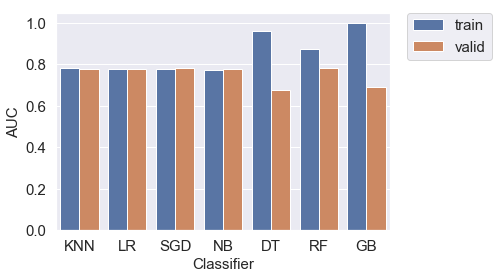

In [90]:
ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)
plt.show()

From the graph, we can see that there are some overfitting problems under Decision Tree model and Gradient Boosting model because there is a big difference of AUC between training and validation datasest.

I also plot other performance metrics: recall, specificity, precision, and accuracy.

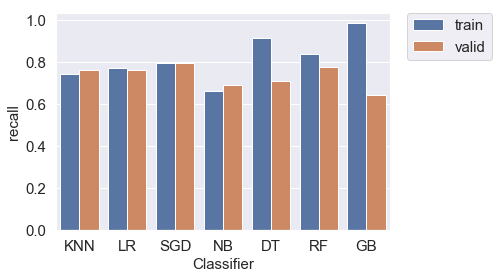

In [91]:
ax = sns.barplot(x="classifier", y="recall", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('recall', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

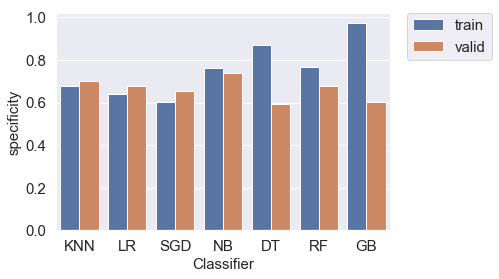

In [92]:
ax = sns.barplot(x="classifier", y="specificity", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('specificity', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

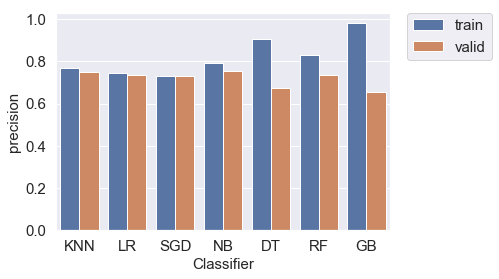

In [93]:
ax = sns.barplot(x="classifier", y="precision", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('precision', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

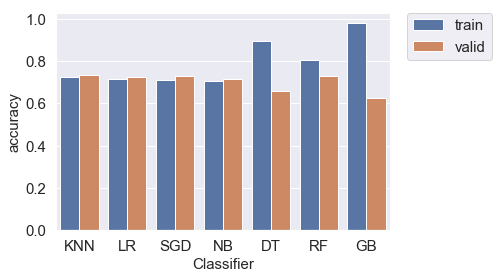

In [94]:
ax = sns.barplot(x="classifier", y="accuracy", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('accuracy', fontsize = 15)
ax.tick_params(labelsize=15)

# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Learning Curves

A few models have similar AUC of the validation set. I pick the random forest as my best baseline model on the validation set to plot a learning curve.

In [95]:
import numpy as np
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("AUC")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring = 'roc_auc')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

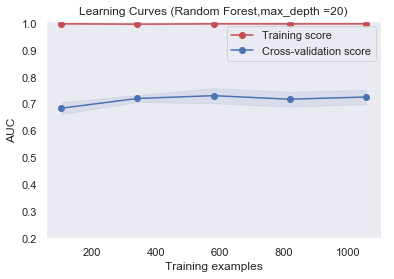

In [96]:
from sklearn.ensemble import RandomForestClassifier
title = "Learning Curves (Random Forest,max_depth =20)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 20, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

From above graph, we can see that a complex Random Forest with max_depth = 20, resulting in high variance.

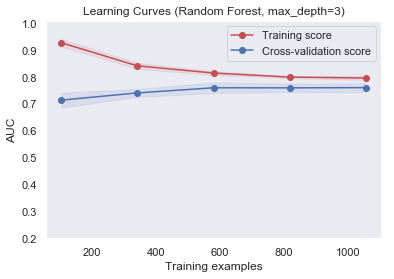

In [97]:
title = "Learning Curves (Random Forest, max_depth=3)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 3, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

From above, a simple Random Forest with max_depth = 3, resulting in high bias

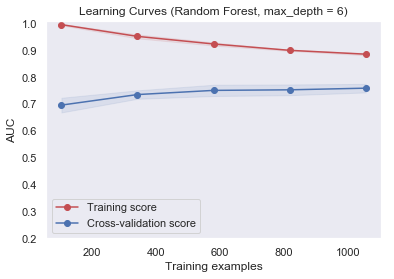

In [98]:
title = "Learning Curves (Random Forest, max_depth = 6)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = RandomForestClassifier(max_depth = 6, random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

The above one is from my baseline random forest model which has high variance.

With the max_depth = 6, the random forest baseline model has high variance (overfitting). To improve the model with high variance, we can use several techniques:


    Add more samples
    Add regularization
    Reduce number of features
    Decrease model complexity
    Add better features
    Change model architecture
    
Source: Andrew Ng's Coursera class paraphrased on https://www.learnopencv.com/bias-variance-tradeoff-in-machine-learning/ and Andrew Ng's Machine Learning Yearning textbook.


In this baseline random forest model, I would try to decrease model complexity. My sample only has 1881 individuals. If the model has more samples, the results might be better.

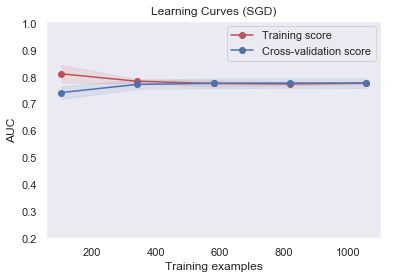

In [99]:
title = "Learning Curves (SGD)"
# Cross validation with 5 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
estimator = SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
plot_learning_curve(estimator, title, X_train_tf, y_train, ylim=(0.2, 1.01), cv=cv, n_jobs=4)

plt.show()

SGD model has high bias. The techniques to reduce high bias should be:

    Add new features
    Increase model complexity (eg. lower alpha) 
    Reduce regularization
    Change model architecture

## Feature Importance

One path for improving your models to understand what features are important to your models. This can usually only be investigated for simpler models such as Logistic Regression or Random Forests. This analysis can help in a few areas:
    
    - inspire new feature ideas --> helps with both high bias and high variance
    - obtain a list of the top features to be used for feature reduction --> helps with high variance
    - point out errors in your pipeline --> helps with robustness of model

Let's get the feature importance for logistic regression and random forest model first.

##### Feature Importance: logistic regression

Logistic regression is a very interpretable model because the coefficient for each variable shows how important that variable is for the prediction. Note that you need to have normalized the data so the coefficients are comparable between variables.

In [100]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state = 42)
lr.fit(X_train_tf, y_train)

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [101]:
# We can extract the coefficients using coef_ and store in a new dataframe (sorted by importance)
feature_importances = pd.DataFrame(lr.coef_[0],
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [102]:
feature_importances.head()

,importance
SS,0.343659
Oscore,0.277727
heroin,0.266894
alcohol,0.146562
Nscore,0.106810


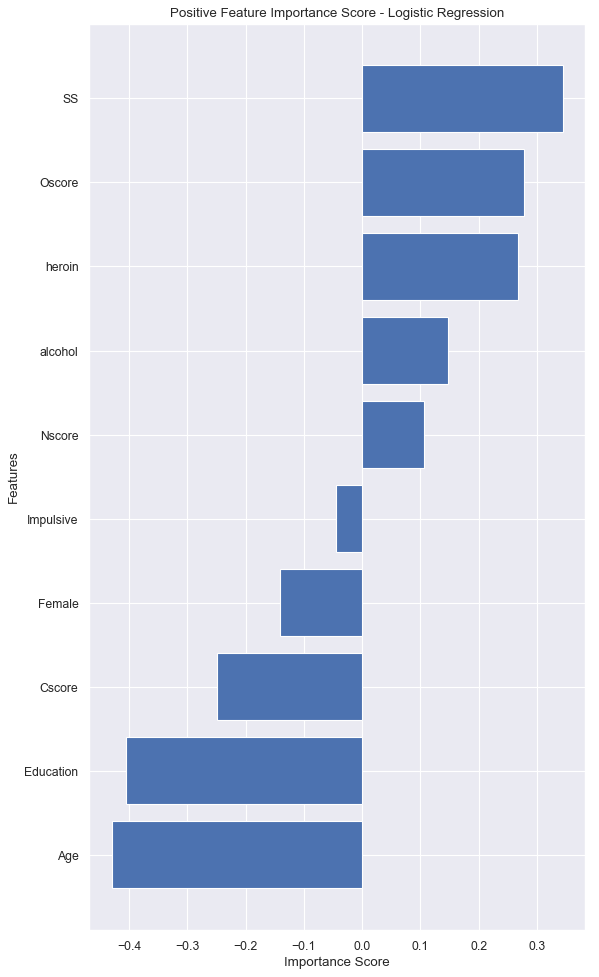

In [103]:
# For logistic regression, the variables with highest positive coefficients are predictive of active Nicotine users
# the variables with highest negative coefficients are predictive of non active Nicotine users
# We can plot the top 15 for each direction below. 
# Note that if you don't have a lot of features, this may show the negative coefficients too. 
num = np.min([15, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

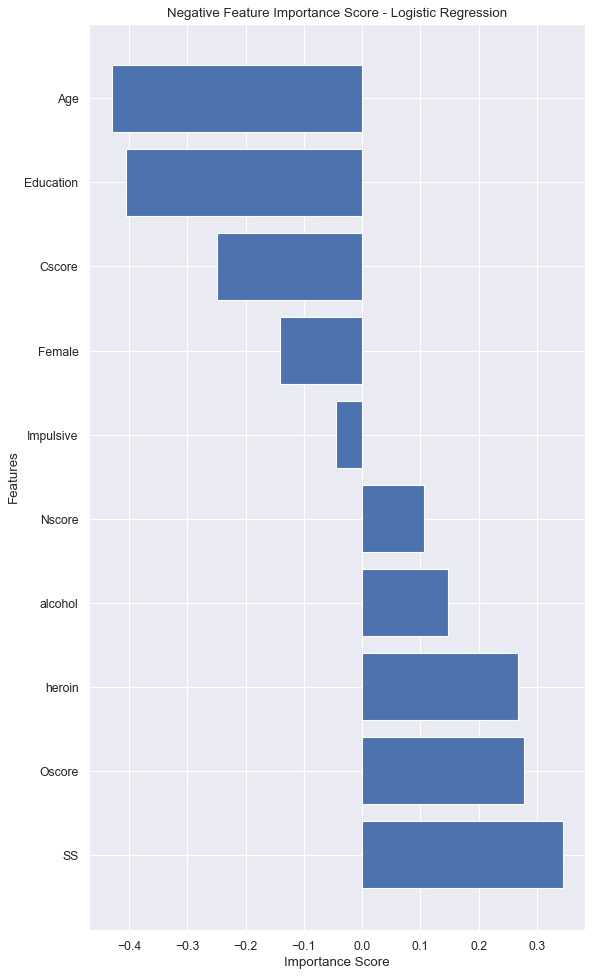

In [104]:
values_to_plot = feature_importances.iloc[-num:].values.ravel()
feature_labels = list(feature_importances.iloc[-num:].index)

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Negative Feature Importance Score - Logistic Regression')
plt.yticks(ylocs, feature_labels)
plt.show()

##### Feature importance: Random Forest

We can also investigate feature importance for random forest (or grad boosting) models. In this case, the feature importance shows how often a particular feature was used to split the data. In this case, we don't know if a particular feature is correlated with the positive class or negative class, but rather it is just importance for making a decision. 

In [105]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [106]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = cols_input,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
feature_importances.head()

,importance
Education,0.173148
SS,0.161183
Age,0.137688
Cscore,0.121270
Nscore,0.087615


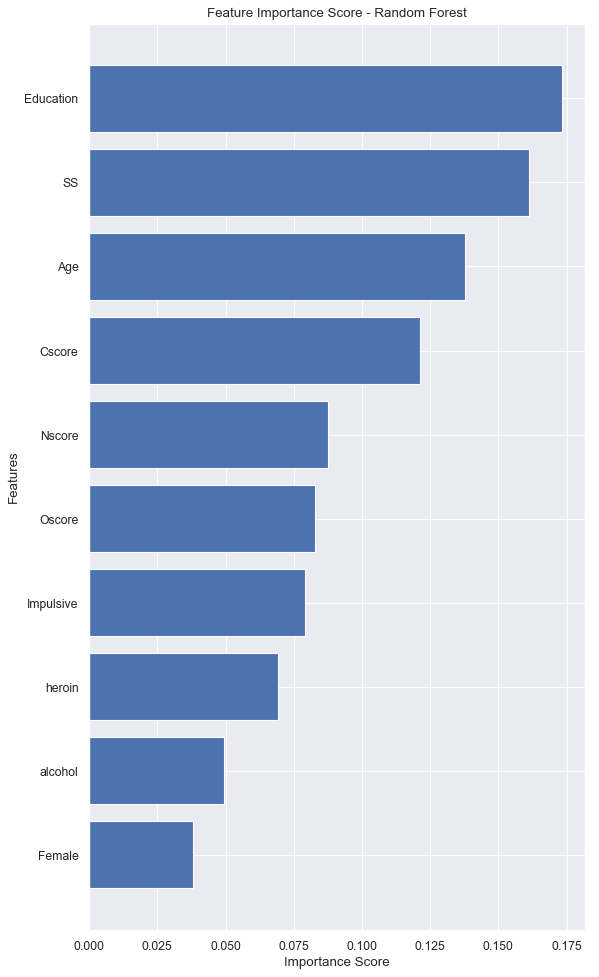

In [107]:
num = np.min([50, len(cols_input)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Feature Importance Score - Random Forest')
plt.yticks(ylocs, feature_labels)
plt.show()

In the logistic regression model, we find that two personality scores, SS and Oscore, positively affect people to be an active users. Similary, people from Ireland and US tend to be active Nicotine users. Also, people who drink alcohol and have heroin tend to be an active Nicotine users. These make senses to me. 

On the other hand, people who are older and have higher education background tend to be non active Nicotine users.  People from NewZealand and higher Cscore tend to ba non active Nicotine users too.

The top variables in the random forest model are education, UK dummy variable, age, and personality variables. This makes sense since you can split continuous variables more times than categorical variables. However, UK dummy is expectional. That means, the model use whether people are from UK to seperate the model often too.

## Hyperparameter tuning

The next thing that we should investigate is hyperparameter tuning. Hyperparameter tuning are essentially the design decisions that you made when you set up the machine learning model. For example, what is the maximum depth for your random forest? Each of these hyperparameters can be optimized to improve the model.

**Before I do the hyperparameter tuning, I reduce the number of features to reduce the overfitting problem of random forest model. I delete 4 less important features: country, race, Ascore, and Cscore. That means, I go back to the input features, and only keep fewer features. Then, I run the model from that line again.**

Let's begin by looking at the effect of a single parameter for random forest: `max_depth`. `max_depth` controls the depth of the tree. 

In [108]:
# train a model for each max_depth in a list. Store the auc for the training and validation set

# max depths
max_depths = np.arange(2,20,2)

train_aucs = np.zeros(len(max_depths))
valid_aucs = np.zeros(len(max_depths))

for jj in range(len(max_depths)):
    max_depth = max_depths[jj]

    # fit model
    rf=RandomForestClassifier(n_estimators = 100, max_depth = max_depth, random_state = 42)
    rf.fit(X_train_tf, y_train)        
    # get predictions
    y_train_preds = rf.predict_proba(X_train_tf)[:,1]
    y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

    # calculate auc
    auc_train = roc_auc_score(y_train, y_train_preds)
    auc_valid = roc_auc_score(y_valid, y_valid_preds)

    # save aucs
    train_aucs[jj] = auc_train
    valid_aucs[jj] = auc_valid

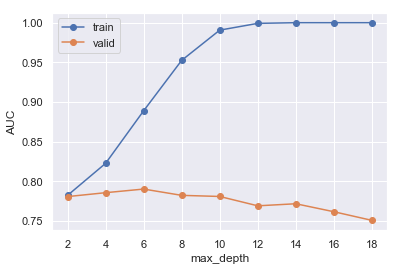

In [109]:
# plot the results
import matplotlib.pyplot as plt

plt.plot(max_depths, train_aucs,'o-',label = 'train')
plt.plot(max_depths, valid_aucs,'o-',label = 'valid')

plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.legend()
plt.show()

From above, we can see that the AUC of training is going up as the max_depth goes up. However, the AUC of validation isn't. We can use techniques to get the optimized parameters. One technique is called Random Search. 

More detals and techniques could be found here: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74  by William Koehrsen. 

Using RandomizedSearchCV, optimize a few of your baseline models. 

In [110]:
rf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 18,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [111]:
# Let's create a grid over a few of these (see the scikit-learn website for the descriptions).
from sklearn.model_selection import RandomizedSearchCV

# number of trees
n_estimators = range(200,1000,200)
# maximum number of features to use at each split
max_features = ['auto','sqrt']
# maximum depth of the tree
max_depth = range(2,20,2)
# minimum number of samples to split a node
min_samples_split = range(2,10,2)
# criterion for evaluating a split
criterion = ['gini','entropy']

# random grid

random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'criterion':criterion}

print(random_grid)

{'n_estimators': range(200, 1000, 200), 'max_features': ['auto', 'sqrt'], 'max_depth': range(2, 20, 2), 'min_samples_split': range(2, 10, 2), 'criterion': ['gini', 'entropy']}


In [112]:
# To use the RandomizedSearchCV function, we need something to score or evaluate a set of hyperparameters. 
# Here we will use the auc.
from sklearn.metrics import make_scorer, roc_auc_score
auc_scoring = make_scorer(roc_auc_score)

##### Optimized Random Forest

In [113]:
# create a baseline model
rf = RandomForestClassifier()

# create the randomized search cross-validation
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 20, cv = 2, 
                               scoring=auc_scoring,verbose = 1, random_state = 42)



#Three important parameters of `RandomizedSearchCV` are
#- scoring = evaluation metric used to pick the best model
#- n_iter = number of different combinations
#- cv = number of cross-validation splits

#increasing the last two of these will increase the run-time, but will decrease chance of overfitting.  
#Note that the number of variables and grid size also influences the runtime. 
#Cross-validation is a technique for splitting the data multiple times to get a better estimate 
#of the performance metric. For the purposes of this tutorial, we will restrict to 2 CV to reduce the time. 

In [114]:
import time
# fit the random search model (this will take a few minutes)
t1 = time.time()
rf_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   38.0s finished


38.96081209182739


In [115]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 6,
 'max_features': 'auto',
 'max_depth': 18,
 'criterion': 'gini'}

In [116]:
# Let's analyze the performance of the best model compared to the baseline model.
rf=RandomForestClassifier(max_depth = 6, random_state = 42)
rf.fit(X_train_tf, y_train)

y_train_preds = rf.predict_proba(X_train_tf)[:,1]
y_valid_preds = rf.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline Random Forest')
rf_train_base_auc = roc_auc_score(y_train, y_train_preds)
rf_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(rf_train_base_auc))
print('Validation AUC:%.3f'%(rf_valid_base_auc))

print('Optimized Random Forest')
y_train_preds_random = rf_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = rf_random.best_estimator_.predict_proba(X_valid_tf)[:,1]

rf_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
rf_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(rf_train_opt_auc))
print('Validation AUC:%.3f'%(rf_valid_opt_auc))

Baseline Random Forest
Training AUC:0.874
Validation AUC:0.782
Optimized Random Forest


/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Training AUC:0.997
Validation AUC:0.771


##### Optimized SGDClassifier

In [117]:
from sklearn.linear_model import SGDClassifier
sgdc=SGDClassifier(loss = 'log',alpha = 0.1,random_state = 42)
sgdc.fit(X_train_tf, y_train)

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.1, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [118]:
penalty = ['none','l2','l1']
max_iter = range(200,1000,200)
alpha = [0.001,0.003,0.01,0.03,0.1,0.3]
random_grid_sgdc = {'penalty':penalty,
              'max_iter':max_iter,
              'alpha':alpha}
# create the randomized search cross-validation
sgdc_random = RandomizedSearchCV(estimator = sgdc, param_distributions = random_grid_sgdc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
sgdc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters

/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters

1.9194049835205078


/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/anaconda3/envs/aly_6020/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


In [119]:
sgdc_random.best_params_

{'penalty': 'l2', 'max_iter': 200, 'alpha': 0.1}

In [120]:
y_train_preds = sgdc.predict_proba(X_train_tf)[:,1]
y_valid_preds = sgdc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline sgdc')
sgdc_train_base_auc = roc_auc_score(y_train, y_train_preds)
sgdc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(sgdc_train_base_auc))
print('Validation AUC:%.3f'%(sgdc_valid_base_auc))

print('Optimized sgdc')
y_train_preds_random = sgdc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = sgdc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
sgdc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
sgdc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(sgdc_train_opt_auc))
print('Validation AUC:%.3f'%(sgdc_valid_opt_auc))

Baseline sgdc
Training AUC:0.778
Validation AUC:0.781
Optimized sgdc
Training AUC:0.778
Validation AUC:0.780


##### Optimize Gradient Boosting Tree Classifier

In [121]:
from sklearn.ensemble import GradientBoostingClassifier
gbc =GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=3, random_state=42)
gbc.fit(X_train_tf, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=1.0, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=42,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [122]:
# number of trees
n_estimators = range(50,200,50)

# maximum depth of the tree
max_depth = range(1,5,1)

# learning rate
learning_rate = [0.001,0.01,0.1]

# random grid

random_grid_gbc = {'n_estimators':n_estimators,
              'max_depth':max_depth,
              'learning_rate':learning_rate}

# create the randomized search cross-validation
gbc_random = RandomizedSearchCV(estimator = gbc, param_distributions = random_grid_gbc, n_iter = 20, cv = 2, scoring=auc_scoring,verbose = 0, random_state = 42)

t1 = time.time()
gbc_random.fit(X_train_tf, y_train)
t2 = time.time()
print(t2-t1)

4.259988069534302


In [123]:
gbc_random.best_params_

{'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}

In [124]:
y_train_preds = gbc.predict_proba(X_train_tf)[:,1]
y_valid_preds = gbc.predict_proba(X_valid_tf)[:,1]

thresh = 0.5

print('Baseline gbc')
gbc_train_base_auc = roc_auc_score(y_train, y_train_preds)
gbc_valid_base_auc = roc_auc_score(y_valid, y_valid_preds)

print('Training AUC:%.3f'%(gbc_train_base_auc))
print('Validation AUC:%.3f'%(gbc_valid_base_auc))
print('Optimized gbc')
y_train_preds_random = gbc_random.best_estimator_.predict_proba(X_train_tf)[:,1]
y_valid_preds_random = gbc_random.best_estimator_.predict_proba(X_valid_tf)[:,1]
gbc_train_opt_auc = roc_auc_score(y_train, y_train_preds_random)
gbc_valid_opt_auc = roc_auc_score(y_valid, y_valid_preds_random)

print('Training AUC:%.3f'%(gbc_train_opt_auc))
print('Validation AUC:%.3f'%(gbc_valid_opt_auc))

Baseline gbc
Training AUC:0.997
Validation AUC:0.688
Optimized gbc
Training AUC:0.859
Validation AUC:0.784


Week 4: Make a plot comparing the performance of the optimized models to the baseline models. 

In [125]:
df_results = pd.DataFrame({'classifier':['SGD','SGD','RF','RF','GB','GB'],
                           'data_set':['baseline','optimized']*3,
                          'auc':[sgdc_valid_base_auc,sgdc_valid_opt_auc,
                                 rf_valid_base_auc,rf_valid_opt_auc,
                                 gbc_valid_base_auc,gbc_valid_opt_auc],
                          })

In [126]:
df_results

,classifier,data_set,auc
0,SGD,baseline,0.780785
1,SGD,optimized,0.780384
2,RF,baseline,0.782493
3,RF,optimized,0.770992
4,GB,baseline,0.688078
5,GB,optimized,0.784050


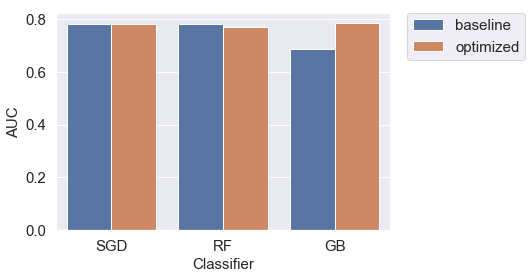

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

ax = sns.barplot(x="classifier", y="auc", hue="data_set", data=df_results)
ax.set_xlabel('Classifier',fontsize = 15)
ax.set_ylabel('AUC', fontsize = 15)
ax.tick_params(labelsize=15)
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize = 15)

plt.show()

## Pick your best model

I will choose Random Forest classifier since it has the highest validation score, and also it has the closest Training and Validation scores.

In [128]:
# You won't want to train your best classifier every time you want to run new predictions. 
# Therefore, we need to save the classifier. We will use the package pickle. 
pickle.dump(rf_random.best_estimator_, open('best_classifier.pkl', 'wb'),protocol = 4)

# Model Evaluation

Evaluate the performance of your best model on the training, validation and test sets. Make an ROC curve too.

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [130]:
# load the model, columns, mean values, and scaler
best_model = pickle.load(open('best_classifier.pkl','rb'))
cols_input = pickle.load(open('cols_input.sav','rb'))
df_mean_in = pd.read_csv('df_mean.csv', names =['col','mean_val'])
scaler = pickle.load(open('scaler.sav', 'rb'))

In [131]:
# load the data
df_train = pd.read_csv('df_train_all.csv')
df_valid= pd.read_csv('df_valid.csv')
df_test= pd.read_csv('df_test.csv')

In [132]:
# fill missing
df_train = fill_my_missing(df_train, df_mean_in, cols_input)
df_valid = fill_my_missing(df_valid, df_mean_in, cols_input)
df_test = fill_my_missing(df_test, df_mean_in, cols_input)

# create X and y matrices
X_train = df_train[cols_input].values
X_valid = df_valid[cols_input].values
X_test = df_test[cols_input].values

y_train = df_train['OUTPUT_LABEL'].values
y_valid = df_valid['OUTPUT_LABEL'].values
y_test = df_test['OUTPUT_LABEL'].values

# transform our data matrices 
X_train_tf = scaler.transform(X_train)
X_valid_tf = scaler.transform(X_valid)
X_test_tf = scaler.transform(X_test)

In [133]:
# calculate prediction probalility
y_train_preds = best_model.predict_proba(X_train_tf)[:,1]
y_valid_preds = best_model.predict_proba(X_valid_tf)[:,1]
y_test_preds = best_model.predict_proba(X_test_tf)[:,1]

In [134]:
# evaluate the performance
thresh = 0.5

print('Training:')
train_auc, train_accuracy, train_recall, train_precision, train_specificity = print_report(y_train,y_train_preds, thresh)
print('Validation:')
valid_auc, valid_accuracy, valid_recall, valid_precision, valid_specificity = print_report(y_valid,y_valid_preds, thresh)
print('Test:')
test_auc, test_accuracy, test_recall, test_precision, test_specificity = print_report(y_test,y_test_preds, thresh)

Training:
AUC:0.997
accuracy:0.973
recall:0.987
precision:0.967
specificity:0.953
prevalence:0.577
 
Validation:
AUC:0.771
accuracy:0.731
recall:0.803
precision:0.726
specificity:0.649
prevalence:0.537
 
Test:
AUC:0.758
accuracy:0.682
recall:0.728
precision:0.682
specificity:0.632
prevalence:0.519
 


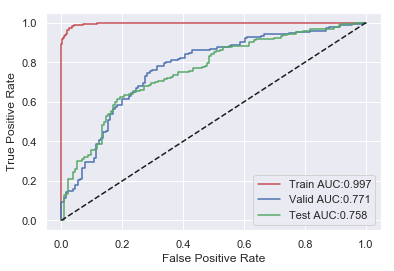

In [135]:
# plot ROC curve
from sklearn.metrics import roc_curve 

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)

fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)

fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_preds)
auc_test = roc_auc_score(y_test, y_test_preds)

plt.plot(fpr_train, tpr_train, 'r-',label ='Train AUC:%.3f'%auc_train)
plt.plot(fpr_valid, tpr_valid, 'b-',label ='Valid AUC:%.3f'%auc_valid)
plt.plot(fpr_test, tpr_test, 'g-',label ='Test AUC:%.3f'%auc_test)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Conclusion

In my project, I use drug consumption dataset from UCI Machine Learning Repository to study individuals' nicotine consumption. I train a predictive model to predict if an individual is an active nicotine user. Active nicotine users means that they use nicotine in the last year, last month, last week, and last day. Non-active nicotine users means they use nicotine in the last decade, a decade ago, or never use.

My selected input features are age, gender, education, 7 personality traits (neuroticism (Nscore), extraversion (Escore), openness to experience (Oscore), agreeableness (Ascore), conscientiousness (Cscore), impulsiveness, and sensation seeking(SS)), alcohol consumption, and heroin consumption.

From my input feature importance tables, I found that individuals with higher sensation seeking score, more openness to experience, larger consumption of heroin and alcohol, and more neuroticism will tend to be an active nicotine users. On the other hand, people who are older, have higher education, more conscientiousness and female will tend to be non-active nicotine users.

One common method to evaluate a binary classifier is the ROC curve graph. If a binary classifier predict every observations correctly, then it would be a straight line on the left border and then the top border. If a binary classifier doesn't predict well it will be closer to the diagonal line. The roc curve graph shows that my model has pretty high accuracy. My sample only has 1881 individuals. I would suggest to add more samples to further reduce the overfitting problems and increase the accuracy of the model.

Therefore the model suggests that younger people who have less education, and higher scores on SS, O, and N would be our focus group. We should provide more educations on this group of people and help them reduce nicotine consumption.